In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import xgboost as xg

In [2]:
data = pd.read_csv('train.csv')
data = pd.DataFrame(data)
data.head()

,date,temp
0,01-01-1980,4.16
1,02-01-1980,4.06
2,03-01-1980,7.12
3,04-01-1980,9.23
4,05-01-1980,3.20


In [3]:
data['date'] = pd.to_datetime(data['date'])

data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day
data['week'] = data['date'].dt.week
data['which_day'] = data['date'].dt.dayofweek
data['quarter'] = data['date'].dt.quarter

In [4]:
data = data.sort_values(by='date')
data.head()

,date,temp,year,month,day,week,which_day,quarter
0,1980-01-01,4.16,1980,1,1,1,1,1
31,1980-01-02,3.55,1980,1,2,1,2,1
60,1980-01-03,6.34,1980,1,3,1,3,1
91,1980-01-04,11.95,1980,1,4,1,4,1
121,1980-01-05,13.39,1980,1,5,1,5,1


In [5]:
data.shape
# data.iloc[:, 2:3]

(11323, 8)

In [9]:
data1 = data.copy()

In [ ]:
data1.head()

In [ ]:
"""
bins = [14, 14.5, 15, 15.5, 16, 16.5, 17, 17.5, 18, 18.5, 19, 19.5, 20]
labels = [1,2,3,4,5,6, 7, 8, 9 ,10, 11, 12]
data1['Year_avg_binned'] = pd.cut(data1['year_temp_avg'], bins=bins, labels=labels)
"""

maps = {1:0,2:0,3:0,4:1,5:1,6:1,7:1,8:1,9:1,10:0,11:0,12:0}
data1['months_map'] = data1['month'].map(maps)

In [10]:
data1.head()

,date,temp,year,month,day,week,which_day,quarter
0,1980-01-01,4.16,1980,1,1,1,1,1
31,1980-01-02,3.55,1980,1,2,1,2,1
60,1980-01-03,6.34,1980,1,3,1,3,1
91,1980-01-04,11.95,1980,1,4,1,4,1
121,1980-01-05,13.39,1980,1,5,1,5,1


In [ ]:
data1.head()

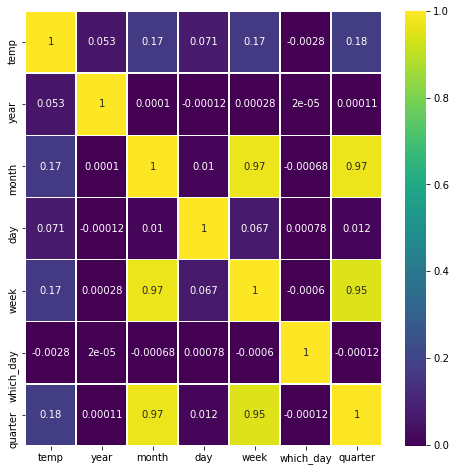

In [11]:
plt.figure(figsize=(8,8))
sns.heatmap(data1.corr(),annot=True,cmap='viridis',linewidths=.5)

In [12]:
final_data = data1.drop(['week', 'which_day', 'date'], axis = 1)

In [17]:
y = final_data['temp']
x_final = final_data.drop(['temp'], axis = 1)

x_train ,x_test, y_train, y_test = train_test_split(x_final, y, test_size = 0.05, random_state=0)

In [18]:
random_model = RandomForestRegressor(n_estimators=500, random_state=0)
#Fit
random_model.fit(x_train, y_train)

y_pred1 = random_model.predict(x_test)

#Checking the accuracy
random_model_accuracy = round(random_model.score(x_train, y_train)*100,2)
print(round(random_model_accuracy,2),'%')

99.25 %


In [19]:
random_model_accuracy_test = round(random_model.score(x_test, y_test)*100,2)
print(round(random_model_accuracy_test,2),'%')

93.63 %


In [20]:
mse = mean_squared_error(y_test, y_pred1)
rmse = np.sqrt(mse)
print(rmse)

1.9856918423158858


In [21]:
# random_state=0 gives 1.973968769098393 rmse (test_size = 0.1), random_state=0 gives 1.985691 rmse (test_size = 0.05)

## XGBoost

In [22]:
# Train and test set are converted to DMatrix objects, 
# as it is required by learning API. 
train_dmatrix = xg.DMatrix(data = x_train, label = y_train) 
test_dmatrix = xg.DMatrix(data = x_test, label = y_test) 

In [23]:
params = {
    # Parameters that we are going to tune- they are default values now.
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
    # Other parameters
    'objective':'reg:squarederror',
}

In [24]:
params['eval_metric'] = "rmse" # metric on which performance is checked and compared.

num_boost_round = 999 # number of trees that will be formed in serach of best model

In [25]:
model = xg.train(
    params,
    train_dmatrix,
    num_boost_round=num_boost_round,
    evals=[(test_dmatrix, "Test")],
    early_stopping_rounds=15 # this number tell that if rmse doesnt change after 15 rounds then stop.
)

[0]	Test-rmse:11.91688
[1]	Test-rmse:8.66280
[2]	Test-rmse:6.38906
[3]	Test-rmse:4.84532
[4]	Test-rmse:3.85227
[5]	Test-rmse:3.24213
[6]	Test-rmse:2.88875
[7]	Test-rmse:2.68270
[8]	Test-rmse:2.56575
[9]	Test-rmse:2.50326
[10]	Test-rmse:2.46717
[11]	Test-rmse:2.43358
[12]	Test-rmse:2.41534
[13]	Test-rmse:2.40035
[14]	Test-rmse:2.39637
[15]	Test-rmse:2.38671
[16]	Test-rmse:2.37500
[17]	Test-rmse:2.36788
[18]	Test-rmse:2.36256
[19]	Test-rmse:2.35989
[20]	Test-rmse:2.35816
[21]	Test-rmse:2.35307
[22]	Test-rmse:2.34297
[23]	Test-rmse:2.33496
[24]	Test-rmse:2.33139
[25]	Test-rmse:2.32516
[26]	Test-rmse:2.31944
[27]	Test-rmse:2.31442
[28]	Test-rmse:2.31034
[29]	Test-rmse:2.30779
[30]	Test-rmse:2.30296
[31]	Test-rmse:2.29661
[32]	Test-rmse:2.29176
[33]	Test-rmse:2.28560
[34]	Test-rmse:2.28730
[35]	Test-rmse:2.28165
[36]	Test-rmse:2.28031
[37]	Test-rmse:2.28338
[38]	Test-rmse:2.28233
[39]	Test-rmse:2.27910
[40]	Test-rmse:2.27755
[41]	Test-rmse:2.27655
[42]	Test-rmse:2.27079
[43]	Test-rmse:2.272

In [27]:
print("Best RMSE: {:.2f} with {} rounds".format(
                 model.best_score,
                 model.best_iteration+1))

Best RMSE: 2.21 with 84 rounds


In [28]:
# In order to tune the other hyperparameters, we will use the cv function from XGBoost. It allows us to run cross-validation
# on our training dataset and returns a mean RMSE score.

# seed: random seed. It's important to set a seed here, to ensure we are using the same folds for each step so we can 
# properly compare the scores with different parameters.

cv_results = xg.cv(
    params,
    train_dmatrix,
    num_boost_round=num_boost_round,
    seed=42,
    nfold=25,
    metrics={'rmse'},
    early_stopping_rounds=15
)

In [29]:
# cv_results
cv_results['test-rmse-mean'].min()

2.0073383600000003

In [32]:
# You can try wider intervals with a larger step between
# each value and then narrow it down. Here after several
# iteration I found that the optimal value was in the
# following ranges.
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(10, 20) 
    for min_child_weight in range(1,3)
]

In [33]:
# Define initial best params and MAE
min_mae = float("Inf")
best_params = None
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))
    # Update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight
    # Run CV
    cv_results = xg.cv(
        params,
        train_dmatrix,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=15,
        metrics={'rmse'},
        early_stopping_rounds=15
    )
    # Update best MAE
    mean_mae = cv_results['test-rmse-mean'].min()
    boost_rounds = cv_results['test-rmse-mean'].argmin()
    print("\tRMSE {} for {} rounds".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = (max_depth,min_child_weight)
        

print("Best params: {}, {}, RMSE: {}".format(best_params[0], best_params[1], min_mae))

CV with max_depth=10, min_child_weight=1
	RMSE 1.8978352 for 83 rounds
CV with max_depth=10, min_child_weight=2
	RMSE 1.9107729333333334 for 80 rounds
CV with max_depth=11, min_child_weight=1
	RMSE 1.8837714 for 68 rounds
CV with max_depth=11, min_child_weight=2
	RMSE 1.8957355333333334 for 63 rounds
CV with max_depth=12, min_child_weight=1
	RMSE 1.8713023333333334 for 55 rounds
CV with max_depth=12, min_child_weight=2
	RMSE 1.8832502 for 38 rounds
CV with max_depth=13, min_child_weight=1
	RMSE 1.8678394 for 37 rounds
CV with max_depth=13, min_child_weight=2
	RMSE 1.8753790666666668 for 36 rounds
CV with max_depth=14, min_child_weight=1
	RMSE 1.8703320666666665 for 39 rounds
CV with max_depth=14, min_child_weight=2
	RMSE 1.8723538 for 26 rounds
CV with max_depth=15, min_child_weight=1
	RMSE 1.8574558666666665 for 30 rounds
CV with max_depth=15, min_child_weight=2
	RMSE 1.8663130666666667 for 26 rounds
CV with max_depth=16, min_child_weight=1
	RMSE 1.8703294666666666 for 26 rounds
CV wi

In [34]:
# 2nd Best params: 19, 2, RMSE: 1.9164610666666666 ranges- (5,20) and (2,4)
# Best params: 15, 1, RMSE:1.8574558666666665 ranges- (10,20) and (1,3)

params['max_depth'] = 15
params['min_child_weight'] = 1

In [35]:
%time
# This can take some time…
min_mae = float("Inf")
best_params = None
for eta in [.3, .2, .1, .05, .01, .005]:
    print("CV with eta={}".format(eta))
    # We update our parameters
    params['eta'] = eta
    # Run and time CV
    %time cv_results = xg.cv(params, train_dmatrix, num_boost_round=num_boost_round, seed=42, nfold=5, metrics=['rmse'], early_stopping_rounds=10)
    # Update best score
    mean_mae = cv_results['test-rmse-mean'].min()
    boost_rounds = cv_results['test-rmse-mean'].argmin()
    print("\tRMSE {} for {} rounds\n".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = eta
        
print("Best params: {}, RMSE: {}".format(best_params, min_mae))

Wall time: 0 ns
CV with eta=0.3
Wall time: 1.41 s
	RMSE 1.9526115999999998 for 21 rounds

CV with eta=0.2
Wall time: 2.08 s
	RMSE 1.9341994 for 37 rounds

CV with eta=0.1
Wall time: 4.56 s
	RMSE 1.9289566 for 73 rounds

CV with eta=0.05
Wall time: 12.5 s
	RMSE 1.9299357999999998 for 151 rounds

CV with eta=0.01
Wall time: 1min 8s
	RMSE 1.9403579999999998 for 698 rounds

CV with eta=0.005
Wall time: 1min 48s
	RMSE 1.960492 for 998 rounds

Best params: 0.1, RMSE: 1.9289566


In [36]:
# eta=0.05
params['eta'] = 0.1

In [37]:
model = xg.train(
    params,
    train_dmatrix,
    num_boost_round=num_boost_round,
    evals=[(test_dmatrix, "Test")],
    early_stopping_rounds=15
)

[0]	Test-rmse:15.03785
[1]	Test-rmse:13.58080
[2]	Test-rmse:12.27076
[3]	Test-rmse:11.09772
[4]	Test-rmse:10.04267
[5]	Test-rmse:9.10193
[6]	Test-rmse:8.25708
[7]	Test-rmse:7.50451
[8]	Test-rmse:6.83353
[9]	Test-rmse:6.23611
[10]	Test-rmse:5.70604
[11]	Test-rmse:5.23588
[12]	Test-rmse:4.81899
[13]	Test-rmse:4.44783
[14]	Test-rmse:4.12211
[15]	Test-rmse:3.83572
[16]	Test-rmse:3.58201
[17]	Test-rmse:3.36212
[18]	Test-rmse:3.16554
[19]	Test-rmse:3.00048
[20]	Test-rmse:2.85866
[21]	Test-rmse:2.73605
[22]	Test-rmse:2.62706
[23]	Test-rmse:2.53571
[24]	Test-rmse:2.45640
[25]	Test-rmse:2.38657
[26]	Test-rmse:2.32336
[27]	Test-rmse:2.27107
[28]	Test-rmse:2.22616
[29]	Test-rmse:2.18732
[30]	Test-rmse:2.15551
[31]	Test-rmse:2.12430
[32]	Test-rmse:2.10494
[33]	Test-rmse:2.08313
[34]	Test-rmse:2.06900
[35]	Test-rmse:2.05161
[36]	Test-rmse:2.03611
[37]	Test-rmse:2.02218
[38]	Test-rmse:2.01041
[39]	Test-rmse:1.99882
[40]	Test-rmse:1.99017
[41]	Test-rmse:1.98205
[42]	Test-rmse:1.97703
[43]	Test-rmse:1

In [38]:
print("Best RMSE: {:.2f} in {} rounds".format(model.best_score, model.best_iteration+1))

Best RMSE: 1.92 in 85 rounds


In [39]:
params

{'max_depth': 15,
 'min_child_weight': 1,
 'eta': 0.1,
 'subsample': 1,
 'colsample_bytree': 1,
 'objective': 'reg:squarederror',
 'eval_metric': 'rmse'}

In [40]:
best_model = xg.train(
    params,
    train_dmatrix,
    num_boost_round=num_boost_round,
    evals=[(test_dmatrix, "Test")]
)

[0]	Test-rmse:15.03785
[1]	Test-rmse:13.58080
[2]	Test-rmse:12.27076
[3]	Test-rmse:11.09772
[4]	Test-rmse:10.04267
[5]	Test-rmse:9.10193
[6]	Test-rmse:8.25708
[7]	Test-rmse:7.50451
[8]	Test-rmse:6.83353
[9]	Test-rmse:6.23611
[10]	Test-rmse:5.70604
[11]	Test-rmse:5.23588
[12]	Test-rmse:4.81899
[13]	Test-rmse:4.44783
[14]	Test-rmse:4.12211
[15]	Test-rmse:3.83572
[16]	Test-rmse:3.58201
[17]	Test-rmse:3.36212
[18]	Test-rmse:3.16554
[19]	Test-rmse:3.00048
[20]	Test-rmse:2.85866
[21]	Test-rmse:2.73605
[22]	Test-rmse:2.62706
[23]	Test-rmse:2.53571
[24]	Test-rmse:2.45640
[25]	Test-rmse:2.38657
[26]	Test-rmse:2.32336
[27]	Test-rmse:2.27107
[28]	Test-rmse:2.22616
[29]	Test-rmse:2.18732
[30]	Test-rmse:2.15551
[31]	Test-rmse:2.12430
[32]	Test-rmse:2.10494
[33]	Test-rmse:2.08313
[34]	Test-rmse:2.06900
[35]	Test-rmse:2.05161
[36]	Test-rmse:2.03611
[37]	Test-rmse:2.02218
[38]	Test-rmse:2.01041
[39]	Test-rmse:1.99882
[40]	Test-rmse:1.99017
[41]	Test-rmse:1.98205
[42]	Test-rmse:1.97703
[43]	Test-rmse:1

[346]	Test-rmse:1.93410
[347]	Test-rmse:1.93410
[348]	Test-rmse:1.93410
[349]	Test-rmse:1.93410
[350]	Test-rmse:1.93410
[351]	Test-rmse:1.93410
[352]	Test-rmse:1.93410
[353]	Test-rmse:1.93410
[354]	Test-rmse:1.93410
[355]	Test-rmse:1.93410
[356]	Test-rmse:1.93410
[357]	Test-rmse:1.93410
[358]	Test-rmse:1.93410
[359]	Test-rmse:1.93410
[360]	Test-rmse:1.93410
[361]	Test-rmse:1.93410
[362]	Test-rmse:1.93410
[363]	Test-rmse:1.93410
[364]	Test-rmse:1.93410
[365]	Test-rmse:1.93410
[366]	Test-rmse:1.93410
[367]	Test-rmse:1.93410
[368]	Test-rmse:1.93410
[369]	Test-rmse:1.93410
[370]	Test-rmse:1.93410
[371]	Test-rmse:1.93410
[372]	Test-rmse:1.93410
[373]	Test-rmse:1.93410
[374]	Test-rmse:1.93410
[375]	Test-rmse:1.93410
[376]	Test-rmse:1.93410
[377]	Test-rmse:1.93410
[378]	Test-rmse:1.93410
[379]	Test-rmse:1.93410
[380]	Test-rmse:1.93410
[381]	Test-rmse:1.93410
[382]	Test-rmse:1.93410
[383]	Test-rmse:1.93410
[384]	Test-rmse:1.93410
[385]	Test-rmse:1.93410
[386]	Test-rmse:1.93410
[387]	Test-rmse:

[688]	Test-rmse:1.93410
[689]	Test-rmse:1.93410
[690]	Test-rmse:1.93410
[691]	Test-rmse:1.93410
[692]	Test-rmse:1.93410
[693]	Test-rmse:1.93410
[694]	Test-rmse:1.93410
[695]	Test-rmse:1.93410
[696]	Test-rmse:1.93410
[697]	Test-rmse:1.93410
[698]	Test-rmse:1.93410
[699]	Test-rmse:1.93410
[700]	Test-rmse:1.93410
[701]	Test-rmse:1.93410
[702]	Test-rmse:1.93410
[703]	Test-rmse:1.93410
[704]	Test-rmse:1.93410
[705]	Test-rmse:1.93410
[706]	Test-rmse:1.93410
[707]	Test-rmse:1.93410
[708]	Test-rmse:1.93410
[709]	Test-rmse:1.93410
[710]	Test-rmse:1.93410
[711]	Test-rmse:1.93410
[712]	Test-rmse:1.93410
[713]	Test-rmse:1.93410
[714]	Test-rmse:1.93410
[715]	Test-rmse:1.93410
[716]	Test-rmse:1.93410
[717]	Test-rmse:1.93410
[718]	Test-rmse:1.93410
[719]	Test-rmse:1.93410
[720]	Test-rmse:1.93410
[721]	Test-rmse:1.93410
[722]	Test-rmse:1.93410
[723]	Test-rmse:1.93410
[724]	Test-rmse:1.93410
[725]	Test-rmse:1.93410
[726]	Test-rmse:1.93410
[727]	Test-rmse:1.93410
[728]	Test-rmse:1.93410
[729]	Test-rmse:

In [41]:
np.sqrt(mean_squared_error(y_test, best_model.predict(test_dmatrix)))

1.9340956677865047

## Creating the prediction csv

In [42]:
test_data = pd.read_csv('test.csv')
test_data = pd.DataFrame(test_data)
test_data.head(1)

,date
0,01-01-2011


In [43]:
test_data['date'] = pd.to_datetime(test_data['date'])

In [44]:
test_data['year'] = test_data['date'].dt.year
test_data['month'] = test_data['date'].dt.month
test_data['day'] = test_data['date'].dt.day
test_data['week'] = test_data['date'].dt.week
test_data['which_day'] = test_data['date'].dt.dayofweek
test_data['quarter'] = test_data['date'].dt.quarter

In [45]:
test_data = test_data.sort_values(by='date')
test_data.head()

,date,year,month,day,week,which_day,quarter
0,2011-01-01,2011,1,1,52,5,1
31,2011-01-02,2011,1,2,52,6,1
59,2011-01-03,2011,1,3,1,0,1
90,2011-01-04,2011,1,4,1,1,1
120,2011-01-05,2011,1,5,1,2,1


In [46]:
final_data_test = test_data.drop(['week', 'which_day', 'date'], axis = 1)

In [49]:
final_data_test.head()

,year,month,day,quarter
0,2011,1,1,1
31,2011,1,2,1
59,2011,1,3,1
90,2011,1,4,1
120,2011,1,5,1


In [53]:
ans = xg.DMatrix(data = final_data_test, label = [])
ams = best_model.predict(ans)
ams

array([ 3.9608576,  4.290081 ,  9.20703  , ..., 25.911413 , 27.49036  ,
       27.76969  ], dtype=float32)

In [55]:
prediction = pd.Series(ams)
prediction.to_csv('file_prediction.csv')